<a href="https://colab.research.google.com/github/sakunisgithub/machine_learning/blob/master/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Loading necessary packages

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 2. Loading the data-set

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/sakunisgithub/data_sets/refs/heads/master/placement.csv')

In [6]:
# data dimension
df.shape

(200, 2)

In [7]:
# column names
df.columns

Index(['cgpa', 'package'], dtype='object')

In [8]:
# data type of the columns
df.dtypes

,0
cgpa,float64
package,float64


In [23]:
# a brief look at the data
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [10]:
# an overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [15]:
# data summary
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [14]:
# checking for missing values
df.isnull().sum()

,0
cgpa,0
package,0


### 3. Visualization

Text(0, 0.5, 'Package (in L.P.A.)')

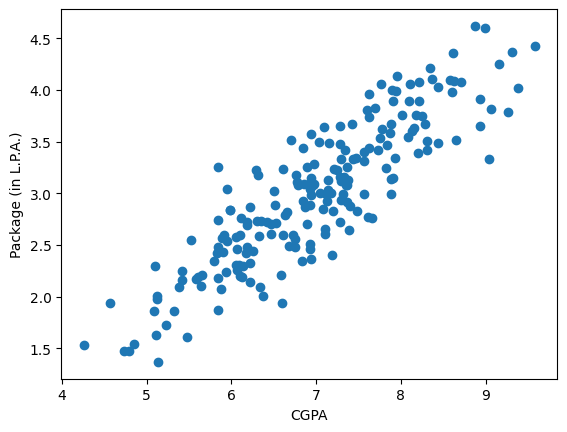

In [20]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package (in L.P.A.)")

### 4. Train-Test Split

In [48]:
X = df.iloc[:, [0]]
y = df.iloc[:, 1]

$\textit{LinearRegression.fit()}$ requires the training data to be 2-dimensional. Doing $X = df.iloc[:, 0]$ makes $X$ a pandas Series, a 1-dimensional object.

Doing $df.iloc[:, [0]]$ is necessary to ensure that the output $X$ is a 2-dimensional dataframe.

In [49]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [50]:
y.head()

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


### 5. Fitting a simple linear regression model

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
# model coefficients
lr.coef_

array([0.58154877])

In [56]:
# model intercept
lr.intercept_

-1.0859839580358033

### 6. Making Predictions

In [74]:
# on a single value
lr.predict(X_test.iloc[[0]])

array([2.9383335])

Similar to $LinearRegression.fit()$, $LinearRegressin.predict()$ also want the input to be 2-dimensional dataframe. Here we select the first row, to ensure that the input is a 2D dataframe, we have to do $X\_test.iloc[[0]]$.

In [75]:
# on the whole test data
lr.predict(X_test) # X_test is already a 2D dataframe

array([2.9383335 , 4.36894346, 3.18258398, 1.89736121, 3.49662031,
       3.35123312, 2.76968435, 2.94996447, 3.07208971, 3.94441286,
       3.57222165, 2.94996447, 2.75805338, 2.64755911, 3.67108494,
       3.2174769 , 3.97930579, 2.90925606, 2.19395108, 3.31052471,
       4.29915761, 2.8918096 , 1.87409926, 2.30444534, 3.62456104,
       2.12998071, 3.9269664 , 2.36841571, 1.5716939 , 2.06601035,
       2.31026083, 3.6885314 , 3.5024358 , 3.03719679, 2.57195777,
       2.39167766, 3.170953  , 3.82228762, 3.15932203, 2.94414898])

In [85]:
# on custom input
print(lr.predict(np.array([7.9]).reshape(1, 1)))
# OR
print(lr.coef_ * 7.9 + lr.intercept_)

[3.50825129]
[3.50825129]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


 ### 7. Visualizing the fitted line

Text(0, 0.5, 'Package (in L.P.A.)')

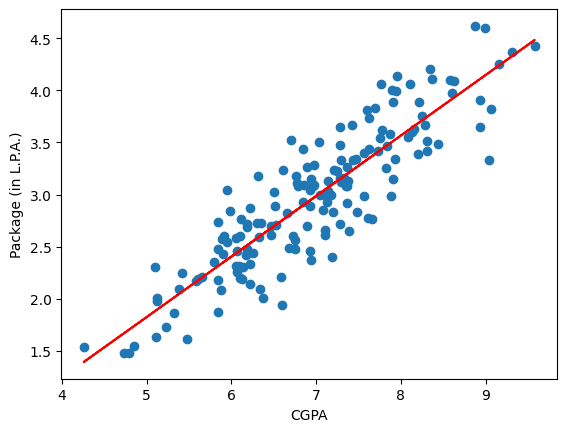

In [80]:
plt.scatter(X_train['cgpa'], y_train)
plt.plot(X_train['cgpa'], lr.predict(X_train), color = "red")
plt.xlabel('CGPA')
plt.ylabel('Package (in L.P.A.)')

Text(0, 0.5, 'Package (in L.P.A.)')

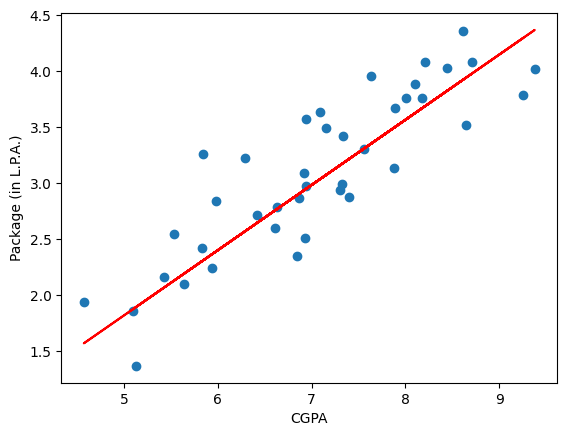

In [81]:
plt.scatter(X_test['cgpa'], y_test)
plt.plot(X_test['cgpa'], lr.predict(X_test), color = "red")
plt.xlabel('CGPA')
plt.ylabel('Package (in L.P.A.)')